# Convolutional Neural Networks in Keras!

## Imports

In [2]:
# If not already installed
!pip install keras
import keras

# OR
from tensorflow import keras

# Sequential model is very useful in Keras
from keras.models import Sequential, model_from_json, model_from_yaml

# Import different layers for defining our networks
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Import numpy
import numpy as np

# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

# For reading paths
import os

## Create Model

## Compile Model and Load Data

In [3]:
# Split data into training and testing
from keras.datasets import mnist

#download mnist data and split into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


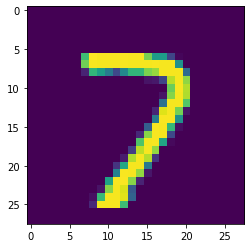

In [4]:
import matplotlib.pyplot as plt
import numpy as np

#plot the first image in the dataset
img_index = np.random.randint(low=0, high=x_train.shape[0])
plt.imshow(x_train[img_index])

In [5]:
#reshape data to fit model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

from keras.utils import to_categorical

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# First, create the model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation='softmax'))

# Now get information about the model
print(model.summary())

# Use our model from above!
print(model.layers)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'MeanSquaredError'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 16)        4624      
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1982720   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [7]:
#train the model
EPOCHS = 2
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS)

Epoch 1/2
1875/1875 [==============================] - 253s 135ms/step - loss: 0.6185 - accuracy: 0.9031 - mean_squared_error: 0.0146 - val_loss: 0.0780 - val_accuracy: 0.9764 - val_mean_squared_error: 0.0037
Epoch 2/2
1875/1875 [==============================] - 250s 133ms/step - loss: 0.0533 - accuracy: 0.9836 - mean_squared_error: 0.0025 - val_loss: 0.0629 - val_accuracy: 0.9830 - val_mean_squared_error: 0.0027
